In [1]:
# imports and loading
from pymodulon.io import *
from pymodulon.plotting import *
from os import path
import seaborn as sns

data_dir = path.join('..','data','processed_data')
interim_dir = path.join('..','data','interim')
ica_data = load_json_model(path.join(interim_dir,'zmo_raw.json.gz'))

import plotly.express as px
import pandas as pd

import matplotlib.pyplot as plt
import mplcursors
from matplotlib.lines import Line2D

def custom_compare_activities(ica_data, imodulon1, imodulon2, color_by_col = '', **kwargs):
    """
    Create an interactive scatterplot comparing the compendium-wide activities of two iModulons.

    Parameters
    ----------
    ica_data: ~pymodulon.core.IcaData
        :class:`~pymodulon.core.IcaData` object
    imodulon1: int or str
        Name of the iModulon to plot on the x-axis
    imodulon2: int or str
        Name of the iModulon to plot on the y-axis
    **kwargs:
        Additional keyword arguments passed to :func:`pymodulon.plotting.scatterplot`

    Returns
    -------
    ax: ~matplotlib.axes.Axes
        :class:`~matplotlib.axes.Axes` containing the scatterplot
    """
    
    # Extract data
    x = ica_data.A.loc[imodulon1]
    y = ica_data.A.loc[imodulon2]
    c = ['blue' for _ in x]
    if len(color_by_col) > 0:
        df = ica_data.sample_table[color_by_col]
        unique_categories = df.unique()
        cmap = plt.get_cmap('tab20')
        category_colors = {category: cmap(i / len(unique_categories)) for i, category in enumerate(unique_categories)}
        c = df.map(category_colors).tolist()
        
        
    labels = ica_data.sample_table.full_name.values

    xlabel = f"{imodulon1} iModulon Activity"
    ylabel = f"{imodulon2} iModulon Activity"

    # Remove xlabel, ylabel, and fit_line kwargs if provided
    kwargs.pop("xlabel", None)
    kwargs.pop("ylabel", None)
    kwargs.pop("fit_line", None)

    # Scatter Plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x, y, c = c, **kwargs)

    # Set axis labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Add interactive cursor for hovering
    cursor = mplcursors.cursor(scatter, hover=True)
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.index])  # Show label for hovered point
    
    if len(color_by_col) > 0:
        legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=category) 
                       for category, color in category_colors.items()]

        # Add the custom legend
        plt.legend(handles=legend_elements, title=color_by_col, loc='upper left', bbox_to_anchor=(1, 1))
        plt.subplots_adjust(right=.6)
    return ax

%matplotlib widget

In [2]:
iM1 = 'ATP_synthase_1'
iM2 = 'unknown_1'

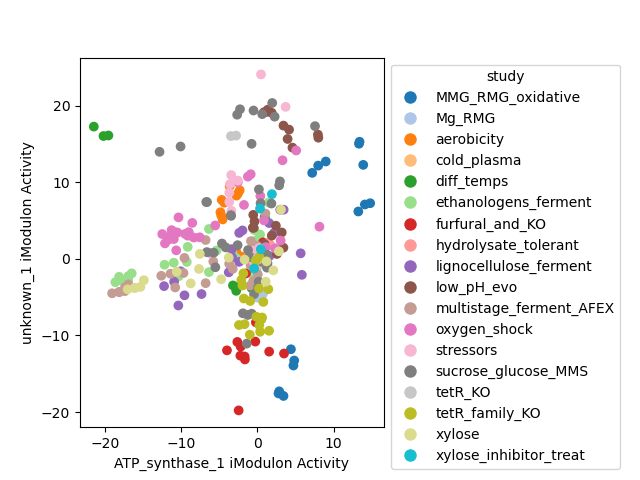

In [4]:
custom_compare_activities(ica_data, iM1, iM2, color_by_col = 'study')
plt.show()

In [5]:
ica_data.view_imodulon(iM1).sort_values(by = 'gene_weight', key = abs, ascending = False)

,gene_weight,gene_name,accession,start,end,strand,gene_product,COG,uniprot,operon,kegg_maps,EC_number,chromosome_id
ZCP4_1550,0.187395,eno,CP006818.1,1734469.0,1735758.0,+,enolase,Carbohydrate transport and metabolism,P33675,Op1633,map00010;map00680;map01100;map01110;map01120;m...,4.2.1.11,CP006818.1
ZCP4_1008,0.165577,atpD,CP006818.1,1133790.0,1135244.0,-,ATP synthase F1 subcomplex beta subunit,Energy production and conversion,Q5NQY9,Op1111,map00190;map00195;map01100,3.6.3.14,CP006818.1
ZCP4_1763,0.154839,ZCP4_1763,CP006818.1,1995787.0,1995936.0,+,hypothetical protein,No COG annotation,NaN,Op1832,NaN,NaN,CP006818.1
ZCP4_1009,0.148311,atpG,CP006818.1,1135273.0,1136169.0,-,ATP synthase F1 subcomplex gamma subunit,Energy production and conversion,Q5NQZ0,Op1112,map00190;map00195;map01100,NaN,CP006818.1
ZCP4_1010,0.147107,atpA,CP006818.1,1136203.0,1137732.0,-,ATP synthase F1 subcomplex alpha subunit,Energy production and conversion,Q5NQZ1,Op1113,map00190;map00195;map01100,3.6.3.14,CP006818.1
ZCP4_0623,0.142469,ZCP4_0623,CP006818.1,712172.0,712411.0,-,ATP synthase F0 subcomplex C subunit,Energy production and conversion,Q5NPR8,Op737,map00190;map00195;map01100,NaN,CP006818.1
ZCP4_1067,0.140106,pgk,CP006818.1,1206032.0,1207225.0,-,phosphoglycerate kinase,Nucleotide transport and metabolism,P09404,Op1168,map00010;map00710;map01100;map01110;map01120;m...,2.7.2.3,CP006818.1
ZCP4_1068,0.137380,gap,CP006818.1,1207448.0,1208461.0,-,glyceraldehyde-3-phosphate dehydrogenase (NAD+),Carbohydrate transport and metabolism,P09316,Op1169,map00010;map00710;map01100;map01110;map01120;m...,1.2.1.12,CP006818.1
ZCP4_1007,0.133544,ZCP4_1007,CP006818.1,1133464.0,1133730.0,-,ATP synthase F1 subcomplex epsilon subunit,Energy production and conversion,Q5NQY8,Op1110,map00190;map00195;map01100,NaN,CP006818.1
ZCP4_0322,0.129047,eda,CP006818.1,362336.0,362962.0,-,2-keto-3-deoxy-phosphogluconate aldolase,Carbohydrate transport and metabolism,Q00384,Op452,map00030;map00630;map01100;map01120;map01200,"4.1.2.14,4.1.3.42",CP006818.1


In [100]:
ica_data.view_imodulon(iM2).sort_values(by = 'gene_weight', key = abs, ascending = False)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,chromosome_id
ZCP4_0579,0.188910,greB,CP006818.1,NaN,658964.0,659461.0,+,transcription elongation factor GreB,Transcription,Q5NPL8,Op695,CP006818.1
ZCP4_1365,0.167314,rnfB,CP006818.1,NaN,1532535.0,1533197.0,+,electron transport complex%2C RnfABCDGE type%2...,Energy production and conversion,Q5NLH3,Op1452,CP006818.1
ZCP4_1364,0.157289,rnfA,CP006818.1,NaN,1531937.0,1532518.0,+,electron transport complex%2C RnfABCDGE type%2...,Energy production and conversion,Q5NLH2,Op1451,CP006818.1
ZCP4_1366,0.152716,ZCP4_1366,CP006818.1,NaN,1533208.0,1534671.0,+,electron transport complex%2C RnfABCDGE type%2...,Energy production and conversion,NaN,Op1453,CP006818.1
ZCP4_0578,0.146638,ZCP4_0578,CP006818.1,NaN,656796.0,658889.0,+,soluble lytic murein transglycosylase-like pro...,Cell wall/membrane/envelope biogenesis,NaN,Op694,CP006818.1
ZCP4_0259,0.141491,ZCP4_0259,CP006818.1,NaN,296809.0,297213.0,-,SufE protein probably involved in Fe-S center ...,Function unknown,NaN,Op392,CP006818.1
ZCP4_0258,0.130503,ZCP4_0258,CP006818.1,NaN,296378.0,296812.0,-,hypothetical protein,"Intracellular trafficking, secretion, and vesi...",NaN,Op391,CP006818.1
ZCP4_0096,0.128894,dxs1,CP006818.1,NaN,106384.0,108333.0,+,1-deoxy-D-xylulose-5-phosphate synthase,Coenzyme transport and metabolism,Q5NN52,Op238,CP006818.1
ZCP4_1368,0.118381,rnfG,CP006818.1,NaN,1535744.0,1536454.0,+,electron transport complex%2C RnfABCDGE type%2...,Energy production and conversion,Q5NLH6,Op1455,CP006818.1
ZCP4_1367,0.117324,rnfD,CP006818.1,NaN,1534671.0,1535747.0,+,electron transport complex%2C RnfABCDGE type%2...,Energy production and conversion,Q5NLH5,Op1454,CP006818.1


In [105]:
df = ica_data.sample_table
samps = df[df['study'] == 'ethanologens_ferment'].index
bby_A = ica_data.A[samps]
bby_A['mean'] = abs(bby_A).mean(axis = 1)
bby_A.sort_values(by = 'mean', key = abs, ascending = False)

/home/chris/miniforge3/envs/modulome/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,SRX5329169,SRX5329170,SRX5329171,SRX5329172,SRX5329173,SRX5329174,SRX5329175,SRX5329176,SRX5329177,SRX5329178,...,SRX5329186,SRX5329187,SRX5329188,SRX5329189,SRX5329190,SRX5329191,SRX5329192,SRX5329193,SRX5329194,mean
translation_1,-19.068447,0.496391,-0.204973,-19.633593,-10.986669,2.909821,-1.155018,-15.874779,1.250129,-21.103399,...,-21.364896,-13.623367,-17.419898,-21.601870,-21.447648,-21.342877,-10.712371,-13.828143,1.734090,12.157167
nitrogen_fixation,13.566857,-0.434658,0.489943,14.309458,9.318660,-0.263021,-0.134102,13.257256,-0.393272,14.225642,...,15.565945,11.535500,13.357999,16.086894,15.164401,15.128054,8.902487,12.334899,-0.947350,8.997738
motility_1,-11.122430,-0.393978,-5.448388,-13.054859,-11.548374,-3.065194,-4.583000,-15.177976,-2.455192,-12.310056,...,-9.067171,-13.421108,-11.757509,-8.210655,-8.910599,-13.438679,-10.292713,-15.857675,-5.676033,8.879130
ATP_synthase_1,-9.280084,0.473194,-0.422106,-12.199288,-3.285730,-0.144011,1.214841,-10.990825,-0.528180,-9.156500,...,-18.649176,-6.372871,-10.372200,-16.512211,-16.973777,-16.949538,-2.818850,-6.374612,0.336287,7.453166
iron_transport,-8.563226,-2.272171,-0.630287,-8.851163,-7.277762,-12.514311,-11.995157,-8.686614,-10.012886,-7.582308,...,-3.460327,-6.718352,-8.804349,-2.854772,-3.172989,-8.632750,-5.913533,-10.280110,-9.163993,6.952528
phage_response_2,14.467926,-0.088156,-0.055419,13.813956,8.216761,-1.249141,-0.081107,13.564439,-0.707323,13.401524,...,4.861864,11.421772,14.301515,3.357023,5.647488,14.695947,4.698060,12.830873,-0.559838,6.708063
glutamate_synthase,-10.206683,0.064785,-2.548772,-11.860179,-6.764457,0.115337,-0.712076,-8.384839,0.271715,-11.179070,...,-11.514606,-9.212191,-10.282015,-9.168686,-11.471324,-10.841764,-5.594487,-7.091957,-0.994192,6.676869
translation_2,-6.337808,1.122070,-2.580144,-7.559493,-6.627144,1.277705,-1.810354,-6.025908,0.327834,-9.118426,...,-10.688322,-7.935282,-7.012254,-10.369816,-10.496863,-8.198792,-6.465612,-5.429433,0.038420,5.966259
phage_response_1,9.303438,-0.300223,-0.561011,9.171002,4.505711,-1.518513,-0.236728,7.338884,-0.007988,9.558661,...,10.903672,6.490590,9.275421,12.941697,10.533090,9.015601,3.838517,6.178918,-1.936447,5.731167
nucleotides_1,-6.496107,-1.177031,-3.455360,-7.351506,-5.762157,-2.040886,-1.917948,-6.784306,-2.149227,-5.918745,...,-9.110098,-8.115171,-7.350973,-8.822233,-8.553051,-7.142556,-3.164908,-7.116290,-2.132108,5.381651


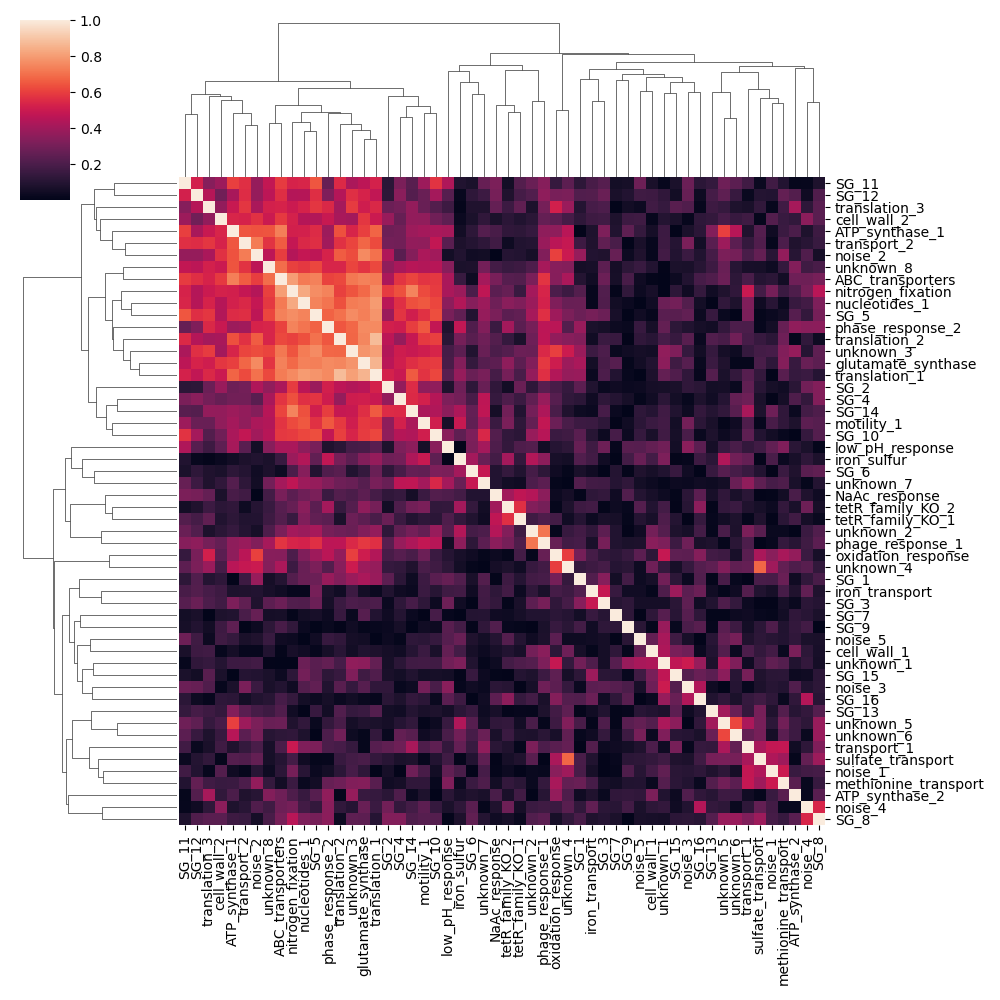

In [16]:
sns.clustermap(abs(ica_data.A.T.corr()), xticklabels=True, yticklabels=True)
plt.show()